# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
archive_df = pd.read_csv('twitter-archive-enhanced (1).csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [15]:
import requests
import os

folder_name = 'workspace'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [3]:
image_df = pd.read_csv('workspace/image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### I used the details of a senior colleague's consumer_key, consumer_secret, access_token and access_secret because I was not able to get access to mine in time in order to submit my project early.

In [20]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'zTy3uMuVxaRMi4w2NEELYhTHV'
consumer_secret = 'SETDDMnlA9IiufPv1nCQ6wg6AXySdZqwlR3KCZumozlPMCTamI'
access_token = '1535948596721360896-aQZb0OlbfQZGNoNOZhXGhIiwUD1duJ'
access_secret = 'cKytOMue6MQr4SSVYf6gaBQOQQdSTlMOlGwkRPPhOwwyQ'

#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,
                wait_on_rate_limit_notify=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
tweet = []
with open ('tweet_json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets.get('id')
        retweet_count = tweets.get('retweet_count')
        favorite_count = tweets.get('favorite_count')
        tweet.append({'id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Fail
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 8

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Rate limit reached. Sleeping for: 710
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Succe

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
23

In [21]:
api_df = pd.DataFrame(tweet, columns = ['id', 'retweet_count', 'favorite_count'])
api_df.to_csv('api_df.csv', index = False)

In [4]:
api_df = pd.read_csv('api_df.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment and programmatic assessement to assess the data.

**Note:** Pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Missing data noticed. Dog stages should be identified in one column.

In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Wrong datatypes and missing values noticed.

In [7]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Odd values of rating denominator noticed

In [8]:
archive_df.shape

(2356, 17)

In [9]:
image_df.shape

(2075, 12)

In [10]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


p1_conf rounds up to 1, mean value is greater than p2_conf and p3_conf

In [12]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Dog breed prediction should be unified (based on prediction score in p_conf column)and unnecessary data deleted.

In [13]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
id                2325 non-null int64
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [14]:
api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,6934,33282
1,892177421306343426,5240,28806
2,891815181378084864,3453,21660
3,891689557279858688,7156,36295
4,891327558926688256,7679,34696


In [15]:
api_df.describe()

,id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,2448.378925,6945.715699
std,6.814903e+16,4142.784568,10787.775558
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,492.000000,1207.000000
50%,7.177900e+17,1139.000000,3005.000000
75%,7.986285e+17,2834.000000,8472.000000
max,8.924206e+17,69908.000000,142856.000000


In [16]:
api_df.shape

(2325, 3)

### Quality & Tidiness issues
1. Correct datatypes for archive_df (Quality Issue)

2. Merge doggo, floofer, pupper and puppo columns in archive_df (Tidiness Issue)

3. Rearrange column order in archive_df (Quality Issue)

4. Correct rating_numerator and rating_denominator columns in archive_df (Quality Issue)

5. Examine irregularities in rating denominator in archive_df (Quality Issue)

6. Remove retweets in archive_df (Quality Issue)

7. Some tweets are not dogs in image_df (Quality Issue)

8. Create unified row for dog breed prediction in image_df (Tidiness Issue)

9. Drop redundant columns in archive_df and image_df (Quality Issue)

10. Correct name column in archive_df (Quality Issue)

11. Rename the id column in api_df to tweet_id to be able to merge (Quality Issue)

12. Merge the 3 datasets on tweet_id column (Tidiness Issue)


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
archive = archive_df.copy()
image = image_df.copy()
api = api_df.copy()

### Issue #1:

#### Correct datatypes for archive_df

#### Code:

In [18]:
#Convert archive_df 'timestamp' column datatype to datetime
archive['timestamp'] = pd.to_datetime(archive['timestamp'])

#### Test:

In [19]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2:

#### Merge doggo, floofer, pupper and puppo columns in archive_df

#### Code:

In [20]:
#First, change 'None' values of 'doggo', 'floofer', 'pupper', 'puppo' columns to NaN
for i in range(len(archive)):
    for j in [13,14,15,16]:
        if archive.iloc[i,j] == 'None':
            archive.iloc[i,j] = np.nan
#Merge columns
archive['dog_stage'] = archive[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ', '.join(x.dropna()), axis=1)
#Set empty cells of 'dog_stage' to NaN
archive['dog_stage'] = archive['dog_stage'].replace('', np.NaN)

#### Test:

In [67]:
archive.head()

,name,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage
0,Phineas,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN
1,Tilly,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN
2,Archie,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN
3,Darla,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN
4,Franklin,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN


In [22]:
archive['dog_stage'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Issue #3:

#### Rearrange column order in archive_df

#### Code:

In [23]:
#Get column order
column_order = archive.columns.tolist()
column_order

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'dog_stage']

In [24]:
#Rearrange 
column_order = [column_order[12]] + column_order[:12] + column_order[13:]
archive = archive[column_order]

#### Test:

In [25]:
archive.head()

,name,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage
0,Phineas,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,NaN,NaN,NaN
1,Tilly,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,NaN,NaN,NaN,NaN
2,Archie,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,NaN,NaN,NaN,NaN
3,Darla,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN,NaN,NaN,NaN
4,Franklin,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN,NaN,NaN,NaN


### Issue #4:

#### Correct rating_numerator and rating_denominator columns in archive_df

#### Code:

In [26]:
import re 

regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''


archive['pattern'] = archive['text'].apply(get_pattern)
archive['fraction'] = archive['rating_numerator'].astype(str) + '/' + archive['rating_denominator'].astype(str)
archive[archive['pattern'] != archive['fraction']][['pattern', 'fraction']]

,pattern,fraction
45,13.5/10,5/10
313,960/00,960/0
340,9.75/10,75/10
387,007/10,7/10
695,9.75/10,75/10
763,11.27/10,27/10
1689,9.5/10,5/10
1712,11.26/10,26/10
2260,-5/10,5/10


In [29]:
archive = archive[archive['pattern'] == archive['fraction']]

#### Test:

In [31]:
archive.head()

,name,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage,pattern,fraction
0,Phineas,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,NaN,NaN,NaN,13/10,13/10
1,Tilly,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,NaN,NaN,NaN,NaN,13/10,13/10
2,Archie,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,NaN,NaN,NaN,NaN,12/10,12/10
3,Darla,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN,NaN,NaN,NaN,13/10,13/10
4,Franklin,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN,NaN,NaN,NaN,12/10,12/10


In [32]:
archive[archive['pattern'] != archive['fraction']]

,name,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage,pattern,fraction


### Issue #5:

#### Examine irregularities in rating denominator in archive_df (Quality Issue)

#### Code:

In [33]:
archive['rating_denominator'].value_counts()

10     2325
50        3
11        3
80        2
20        2
15        1
16        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
2         1
Name: rating_denominator, dtype: int64

To have a good evaluation of the rating each dog received, there has to be a rating meter. We set this meter to 10 which is the most frequent denominator

In [34]:
archive[archive['rating_denominator'] != 10]

,name,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage,pattern,fraction
342,None,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN,11/15,11/15
433,None,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,NaN,NaN,NaN,84/70,84/70
516,Sam,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,NaN,NaN,NaN,NaN,NaN,24/7,24/7
784,None,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN,9/11,9/11
902,None,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,NaN,NaN,NaN,165/150,165/150
1068,None,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN,9/11,9/11
1120,this,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,NaN,NaN,NaN,NaN,204/170,204/170
1165,None,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN,NaN,NaN,NaN,4/20,4/20
1202,Bluebert,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,NaN,NaN,NaN,NaN,NaN,50/50,50/50
1228,None,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,NaN,NaN,NaN,NaN,99/90,99/90


Sample examination showed that the ratings were extracted erroneously, suggesting lack of data integrity for ratings that don't have their denominators as 10

In [35]:
archive = archive[archive['rating_denominator'] == 10]

#### Test:

In [36]:
archive['rating_denominator'].value_counts()

10    2325
Name: rating_denominator, dtype: int64

### Issue #6:

#### Remove retweets in archive_df

#### Code:

In [37]:
#Check rows with values for 'retweeted_status_id' column
archive[archive['retweeted_status_id'].notna()]

,name,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage,pattern,fraction
19,Canela,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,NaN,NaN,NaN,NaN,NaN,13/10,13/10
32,None,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,NaN,NaN,NaN,12/10,12/10
36,Lilly,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,NaN,NaN,NaN,NaN,NaN,13/10,13/10
68,Emmy,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,NaN,NaN,NaN,NaN,NaN,14/10,14/10
73,Shadow,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,NaN,NaN,NaN,NaN,NaN,13/10,13/10
74,Terrance,878316110768087041,NaN,NaN,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,NaN,NaN,NaN,NaN,NaN,11/10,11/10
78,None,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,NaN,NaN,pupper,NaN,pupper,14/10,14/10
91,Coco,874434818259525634,NaN,NaN,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,NaN,NaN,NaN,NaN,NaN,12/10,12/10
95,Walter,873697596434513921,NaN,NaN,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,NaN,NaN,NaN,NaN,NaN,14/10,14/10
97,Sierra,873337748698140672,NaN,NaN,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,NaN,NaN,pupper,NaN,pupper,12/10,12/10


In [38]:
#Drop rows with NaN for 'retweeted_status_id' column
archive = archive[archive['retweeted_status_id'].isnull()]

In [40]:
#Drop rows with NaN for 'in_reply_to_status_id' column
archive = archive[archive['in_reply_to_status_id'].isnull()]

#### Test:

In [41]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 20 columns):
name                          2076 non-null object
tweet_id                      2076 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2076 non-null datetime64[ns]
source                        2076 non-null object
text                          2076 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2076 non-null int64
rating_denominator            2076 non-null int64
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        229 non-null object
puppo                         24 non-null object
dog_stage                     335 non-n

### Issue #7:

#### Some tweets are not dogs in image_df

#### Code:

In [42]:
image[(image['p1_dog'] == False)&(image['p2_dog'] == False)&(image['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [43]:
#Drop rows whose predictions are not dog breeds
index_false = image[(image['p1_dog'] == False)&(image['p2_dog'] == False)&(image['p3_dog'] == False)].index
image.drop(index_false, inplace = True)

#### Test:

In [44]:
image[(image['p1_dog'] == False)&(image['p2_dog'] == False)&(image['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8:

#### Create unified row for dog breed prediction in image_df

#### Code:

In [47]:
image[image['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.962465,False,0,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,Newfoundland,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,Irish_terrier,0.505184,False,Irish_terrier,0.104109,True,0,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,miniature_pinscher,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,Rottweiler,0.507637,False,Rottweiler,0.062490,True,0,0.048425,False
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,Chesapeake_Bay_retriever,0.447893,False,0,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,vizsla,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,Chihuahua,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,miniature_pinscher,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,boxer,0.452517,False,boxer,0.196655,True,0,0.160983,False


In [45]:
#First, change 'p1', 'p2' and 'p3' values to NaN if any of 'p1_dog', 'p2_dog' and 'p3_dog' columns respectively is False
for i in range(len(image)):
    for j in [5,8,11]:
        if image.iloc[i,j] == False:
            image.iloc[i,j-2] = 0

#Merge columns 'p1', 'p2' and 'p3' into 1 ('p1')
for k in range(len(image)):
    if image.iloc[k,3] == 0:
        if image.iloc[k,6] != 0:
            image.iloc[k,3] = image.iloc[k,6]
        elif image.iloc[k,9] != 0:
            image.iloc[k,3] = image.iloc[k,9]

#### Test:

In [46]:
image[image['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #9:

#### Drop redundant columns in archive_df and image_df

#### Code:

In [51]:
archive.head()

,name,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stage,pattern,fraction
0,Phineas,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,NaN,NaN,NaN,NaN,13/10,13/10
1,Tilly,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,NaN,NaN,NaN,NaN,13/10,13/10
2,Archie,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,NaN,NaN,NaN,NaN,12/10,12/10
3,Darla,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,NaN,NaN,NaN,NaN,13/10,13/10
4,Franklin,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,NaN,NaN,NaN,NaN,12/10,12/10


In [53]:
#Delete 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
#'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper' and 'puppo' columns, they are no longer needed.
archive.drop(archive.iloc[:, [2,3,7,8,9,13,14,15,16,18,19]], axis = 1, inplace = True)

In [54]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [55]:
#Drop columns 'p1_conf', 'p1_dog', 'p2, 'p2_conf', 'p2_dog', 'p3', 'p3_conf' and 'p3_dog' columns, they are no longer needed.
image.drop(image.iloc[:, 4:], axis = 1, inplace = True)

#### Test:

In [56]:
archive.head()

,name,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage
0,Phineas,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN
1,Tilly,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN
2,Archie,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN
3,Darla,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN
4,Franklin,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN


In [57]:
image.head()

,tweet_id,jpg_url,img_num,p1
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### Issue #10:

#### Correct name column in archive_df

In [58]:
archive['name'].value_counts()

None         591
a             54
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
the            8
Winston        8
Sadie          8
Lola           8
Daisy          7
Toby           7
Jax            6
Stanley        6
Bailey         6
Koda           6
Bo             6
Oscar          6
Dave           5
an             5
Rusty          5
Buddy          5
Bella          5
Leo            5
Louis          5
Scout          5
Milo           5
Chester        5
            ... 
Siba           1
Baloo          1
Snickers       1
Crumpet        1
BeBe           1
Tedders        1
Josep          1
Dot            1
Jersey         1
Sky            1
Ziva           1
Leonard        1
Herb           1
Stephanus      1
Nollie         1
Sid            1
Stewie         1
Harper         1
Chuq           1
Monty          1
Shaggy         1
Zeek           1
Maks           1
Kingsley       1
Devón          1
Dietrich       1
Travis         1
Superpup      

Observe carefully all lowercase names are invalid

In [59]:
archive['name'] = archive['name'].str.replace('^[a-z]+', 'None')

#### Test:

In [60]:
archive['name'].value_counts()

None         692
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           8
Daisy          7
Toby           7
Jax            6
Bo             6
Oscar          6
Stanley        6
Koda           6
Bailey         6
Scout          5
Rusty          5
Dave           5
Buddy          5
Leo            5
Milo           5
Louis          5
Bentley        5
Bella          5
Chester        5
Alfie          4
Larry          4
            ... 
Siba           1
Baloo          1
Snickers       1
Crumpet        1
Dylan          1
BeBe           1
Toffee         1
Tedders        1
Chuq           1
Sky            1
Ziva           1
Leonard        1
Herb           1
Stephanus      1
Nollie         1
Sid            1
Stewie         1
Harper         1
Monty          1
Shawwn         1
Shaggy         1
Zeek           1
Maks           1
Kingsley       1
Devón          1
Dietrich       1
Travis         1
Superpup      

### Issue #11:

#### Rename the id column in api_df to tweet_id to be able to merge

#### Code:

In [61]:
api.rename(columns = {'id' : 'tweet_id'}, inplace = True)

#### Test:

In [62]:
api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6934,33282
1,892177421306343426,5240,28806
2,891815181378084864,3453,21660
3,891689557279858688,7156,36295
4,891327558926688256,7679,34696


### Issue #12:

#### Merge archive_df, image_df and api_df based on column 'tweet_id'

#### Code:

In [68]:
merged_data = pd.merge(archive, image, how = "inner", on = 'tweet_id')
merged_data = pd.merge(merged_data, api, how = "inner", on = 'tweet_id')

#### Test

In [69]:
merged_data.head()

,name,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,retweet_count,favorite_count
0,Tilly,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,5240,28806
1,Archie,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,3453,21660
2,Darla,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,7156,36295
3,Franklin,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,7679,34696
4,None,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,2569,17471


#### Notice that rows with unmatched 'tweet_id' are deleted

#### Check for duplicates

In [70]:
merged_data.duplicated(subset = ['tweet_id']).sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
merged_data.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [72]:
df = pd.read_csv('twitter_archive_master.csv')

In [73]:
df.head()

,name,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,retweet_count,favorite_count
0,Tilly,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,5240,28806
1,Archie,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,3453,21660
2,Darla,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,7156,36295
3,Franklin,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,7679,34696
4,None,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,2569,17471


In [74]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1.638000e+03,1638.000000,1638.0,1638.000000,1638.000000,1638.000000
mean,7.393385e+17,10.817460,10.0,1.215507,2267.515873,7905.004884
std,6.806968e+16,1.777897,0.0,0.575899,4136.396314,11655.559254
min,6.660209e+17,0.000000,10.0,1.000000,11.000000,64.000000
25%,6.773183e+17,10.000000,10.0,1.000000,510.000000,1776.250000
50%,7.138403e+17,11.000000,10.0,1.000000,1122.000000,3682.500000
75%,7.931921e+17,12.000000,10.0,1.000000,2574.750000,9775.750000
max,8.921774e+17,14.000000,10.0,4.000000,69908.000000,142856.000000


In [77]:
#Most common dog
df['p1'].value_counts()

golden_retriever                  152
Labrador_retriever                100
Pembroke                           94
Chihuahua                          89
pug                                62
toy_poodle                         49
chow                               47
Samoyed                            41
Pomeranian                         40
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Shih-Tzu                           20
beagle                             20
Staffordshire_bullterrier          19
Siberian_husky                     19
Rottweiler                         18
Shetland_sheepdog                  18
Maltese_dog                        18
basset                             17
Lakeland_terrier                   17
Italian_grey

In [78]:
#Breed with most rating greater than mean
df['p1'][df['rating_numerator'] >= df['rating_numerator'].mean()].value_counts()

golden_retriever              122
Pembroke                       78
Labrador_retriever             70
Chihuahua                      48
chow                           37
toy_poodle                     35
Samoyed                        35
Pomeranian                     28
pug                            25
cocker_spaniel                 22
French_bulldog                 20
malamute                       19
Chesapeake_Bay_retriever       15
Cardigan                       15
Eskimo_dog                     15
Siberian_husky                 14
miniature_pinscher             13
Rottweiler                     12
basset                         12
German_shepherd                12
Staffordshire_bullterrier      11
Great_Pyrenees                 11
kuvasz                         11
vizsla                         10
kelpie                         10
Shih-Tzu                       10
Pekinese                        9
Old_English_sheepdog            9
Shetland_sheepdog               9
schipperke    

In [104]:
#Breed with highest retweets
df['p1'][df['retweet_count'] == df['retweet_count'].max()].value_counts()

Labrador_retriever    1
Name: p1, dtype: int64

In [106]:
#Breed with highest likes
df['p1'][df['favorite_count'] == df['favorite_count'].max()].value_counts()

Labrador_retriever    1
Name: p1, dtype: int64

In [113]:
#Breed with highest retweets and likes
df[df['retweet_count'] == df['retweet_count'].max()]

,name,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,retweet_count,favorite_count
673,None,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,69908,142856


In [88]:
#Breed with lowest rating
df[['p1', 'rating_numerator']].set_index('p1').nsmallest(10, ['rating_numerator'])

,rating_numerator
p1,
American_Staffordshire_terrier,0
Maltese_dog,2
miniature_pinscher,2
Afghan_hound,3
Chihuahua,3
Dandie_Dinmont,3
soft-coated_wheaten_terrier,3
pug,3
Pembroke,4


In [89]:
df[df['p1'] == 'American_Staffordshire_terrier'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1.500000e+01,15.000000,15.0,15.000000,15.000000,15.000000
mean,7.545525e+17,10.133333,10.0,1.200000,1635.933333,7075.533333
std,6.893052e+16,3.090693,0.0,0.560612,1059.019322,6261.655097
min,6.685423e+17,0.000000,10.0,1.000000,178.000000,399.000000
25%,6.890325e+17,10.000000,10.0,1.000000,850.500000,2551.500000
50%,7.388850e+17,11.000000,10.0,1.000000,1304.000000,4948.000000
75%,8.239820e+17,11.500000,10.0,1.000000,2770.500000,10204.500000
max,8.471162e+17,13.000000,10.0,3.000000,3269.000000,20650.000000


In [90]:
df[df['p1'] == 'Maltese_dog'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1.800000e+01,18.000000,18.0,18.000000,18.000000,18.000000
mean,6.882493e+17,9.777778,10.0,1.277778,1030.166667,2572.111111
std,2.080871e+16,2.129776,0.0,0.460889,1209.679260,2190.277175
min,6.668268e+17,2.000000,10.0,1.000000,78.000000,218.000000
25%,6.759462e+17,10.000000,10.0,1.000000,481.500000,1602.000000
50%,6.789501e+17,10.000000,10.0,1.000000,735.500000,2104.500000
75%,6.941588e+17,10.750000,10.0,1.750000,989.000000,2767.500000
max,7.349123e+17,12.000000,10.0,2.000000,5453.000000,10292.000000


In [91]:
df[df['p1'] == 'miniature_pinscher'].describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,2.400000e+01,24.000000,24.0,24.000000,24.000000,24.000000
mean,7.318021e+17,10.041667,10.0,1.291667,1850.083333,6922.416667
std,6.576371e+16,2.612331,0.0,0.690253,2115.766321,8224.927048
min,6.660492e+17,2.000000,10.0,1.000000,36.000000,88.000000
25%,6.724810e+17,9.750000,10.0,1.000000,337.250000,1458.750000
50%,7.125994e+17,11.000000,10.0,1.000000,1085.000000,3138.500000
75%,7.869781e+17,12.000000,10.0,1.000000,2400.500000,8519.000000
max,8.800958e+17,12.000000,10.0,4.000000,8733.000000,28829.000000


In [92]:
#Breed with lowest mean rating
df.groupby('p1').mean().nsmallest(10, ['rating_numerator'])

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
p1,,,,,,
Japanese_spaniel,6.773010e+17,5.000000,10.0,1.000000,352.000000,1097.000000
soft-coated_wheaten_terrier,7.056062e+17,8.166667,10.0,1.083333,836.083333,2861.833333
Scotch_terrier,6.892838e+17,9.000000,10.0,1.000000,993.000000,2982.000000
Walker_hound,7.333173e+17,9.000000,10.0,1.200000,2112.600000,5496.000000
Ibizan_hound,6.844888e+17,9.250000,10.0,1.500000,1168.750000,2685.750000
Tibetan_terrier,6.973258e+17,9.250000,10.0,1.000000,438.250000,1533.000000
dalmatian,7.154213e+17,9.333333,10.0,1.000000,1372.416667,4317.166667
Boston_bull,7.286202e+17,9.416667,10.0,1.166667,1151.666667,4424.416667
Welsh_springer_spaniel,7.318789e+17,9.500000,10.0,1.000000,866.750000,4249.750000


### Insights:
1. Mean dog rating is 12/10

2. The most common dog is the Golden Retriever

3. Breed mostly rated high (mean rating and higher) is the Golden Retriever

4. Breed with the highest likes is the Labrador Retriever

5. Some dogs had really low ratings

### Visualization

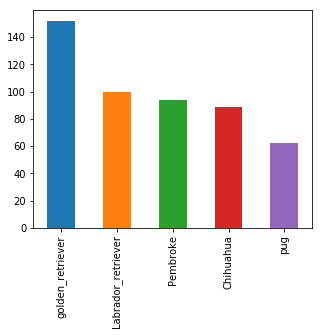

In [94]:
df['p1'].value_counts()[:5].plot(kind = 'bar', figsize = (5,4));

#### Golden Retriever is most common breed

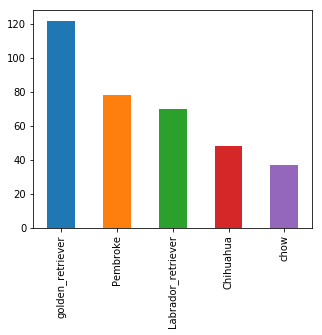

In [95]:
df['p1'][df['rating_numerator'] >= df['rating_numerator'].mean()].value_counts()[:5].plot(kind = 'bar', figsize = (5,4));

#### Golden Retriever is the most highly rated breed

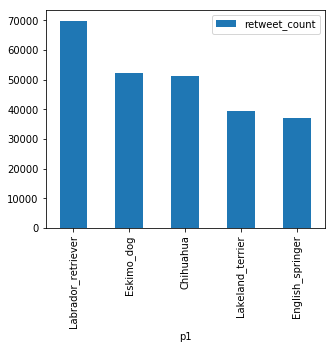

In [116]:
df[['p1', 'retweet_count']].set_index('p1').nlargest(5, ['retweet_count']).plot(kind = 'bar', figsize = (5,4));

#### Breed with the highest retweets is the Labrador Retriever

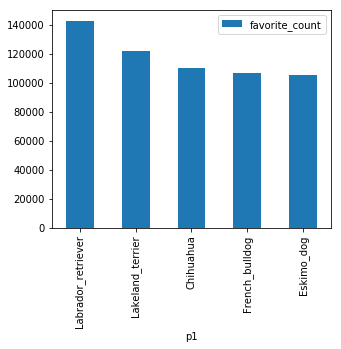

In [117]:
df[['p1', 'favorite_count']].set_index('p1').nlargest(5, ['favorite_count']).plot(kind = 'bar', figsize = (5,4));

#### Breed with the highest likes is the Labrador Retriever

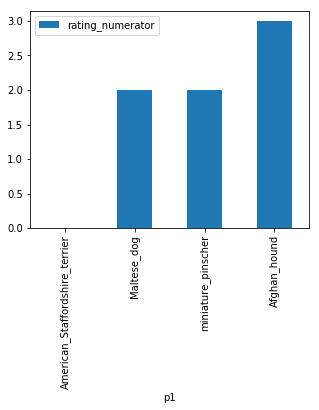

In [99]:
df[['p1', 'rating_numerator']].set_index('p1').nsmallest(4, ['rating_numerator']).plot(kind = 'bar', figsize = (5,4));

#### The breed with lowest rating score is the American Straffordshire Terrier

#### I got a lot of help wrangling my data from Stackoverflow, Geeksforgeeks, Dataquest, Towardsdatascience, Marsja and Pandas documentation